# Import Required Libraries
Import the necessary libraries, including pandas, numpy, matplotlib, seaborn, sklearn, and any other required libraries.

# Load and Explore Data
Load the dataset into a pandas DataFrame and explore the data to understand its structure and contents.

In [6]:
# Load and Explore Data

# Load the dataset into a pandas DataFrame
data_1 = pd.read_csv('Movies_and_TV_to_Books_similarities.csv')
data_2 = pd.read_csv('Health_and_Household_to_Books_similarities.csv')

/var/folders/sh/fjb1r_5j6gxcy4lzfcc4_4zr0000gn/T/ipykernel_39449/1872605715.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data_1 = pd.read_csv('Movies_and_TV_to_Books_similarities.csv')
/var/folders/sh/fjb1r_5j6gxcy4lzfcc4_4zr0000gn/T/ipykernel_39449/1872605715.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2 = pd.read_csv('Health_and_Household_to_Books_similarities.csv')


# Preprocess Data
Preprocess the data by handling missing values, normalizing the embeddings, and preparing the data for visualization and clustering.

In [ ]:
# only keep main_category, embeddings
data_1 = data_1[['embeddings']]
data_2 = data_2[['embeddings']]

# only keep first 1000 rows
data = data.head(1000)

# Normalize the embeddings
embeddings = np.array(data['embeddings'].apply(lambda x: np.fromstring(x.strip('[]'), sep=' ')).tolist())
embeddings = (embeddings - embeddings.mean(axis=0)) / embeddings.std(axis=0)

# Add normalized embeddings back to the DataFrame
data['normalized_embeddings'] = list(embeddings)

# Prepare the data for visualization and clustering
# Reduce dimensionality using PCA
pca = PCA(n_components=50)
pca_embeddings = pca.fit_transform(embeddings)

# Further reduce dimensionality using t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_embeddings = tsne.fit_transform(pca_embeddings)

# Add t-SNE embeddings back to the DataFrame
data['tsne_x'] = tsne_embeddings[:, 0]
data['tsne_y'] = tsne_embeddings[:, 1]

# Display the first few rows of the preprocessed DataFrame
data.head()

,main_category,embeddings,normalized_embeddings,tsne_x,tsne_y
0,Prime Video,[ 5 6 2 -5 -3 -1 29 7 9 -4 5 -...,"[0.474380666655477, 0.42609189185980473, 0.202...",17.220158,-2.607507
1,Movies & TV,[ 5 9 -6 -8 7 2 3 0 9 3 9 ...,"[0.474380666655477, 0.8248054525520736, -1.200...",-18.407408,-0.112116
2,Movies & TV,[ 3 8 12 -20 -5 15 21 0 -18 -8 -6 ...,"[0.1348096812184856, 0.6919009323213173, 1.957...",-25.873486,7.892994
3,Movies & TV,[ 0 17 6 -7 1 14 8 -3 -8 -11 5 ...,"[-0.37454679693700155, 1.8880416143981242, 0.9...",-18.153362,3.993148
4,Prime Video,[-14 -8 13 0 -8 0 1 0 12 -3 0 ...,"[-2.7515436949959415, -1.4345713913707838, 2.1...",-23.255816,-5.217656


# Visualize Embeddings with PCA
Use Principal Component Analysis (PCA) to reduce the dimensionality of the embeddings and visualize them in a 2D plot.

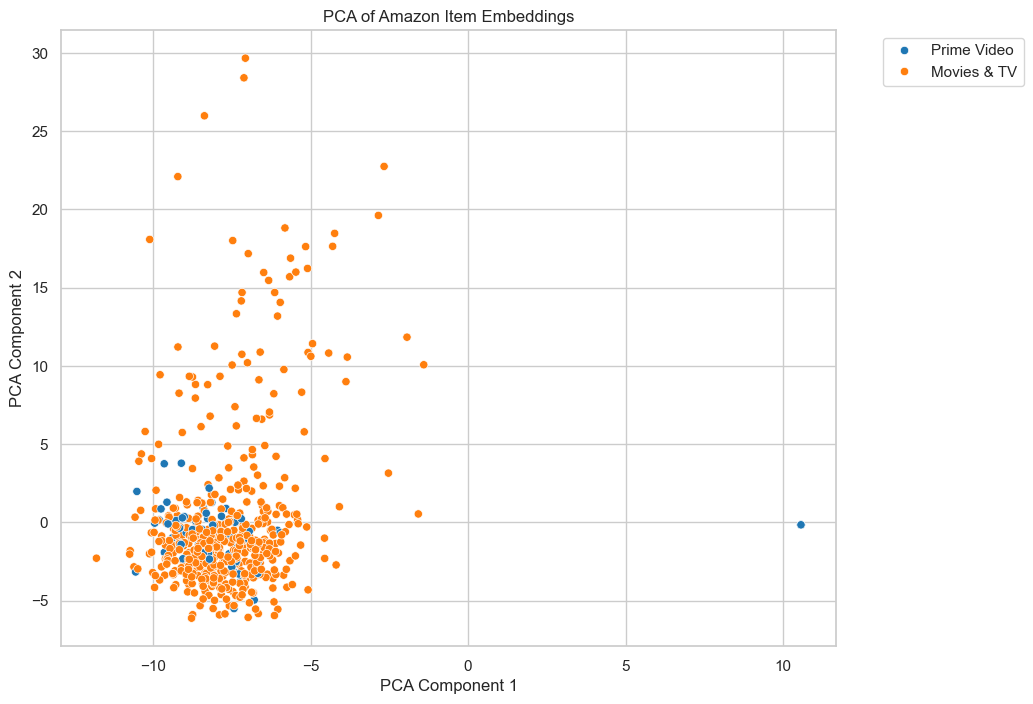

In [4]:
# Visualize Embeddings with PCA

# Perform PCA to reduce the dimensionality of the embeddings to 2 components
pca_2d = PCA(n_components=2)
pca_2d_embeddings = pca_2d.fit_transform(embeddings)

# Add PCA embeddings back to the DataFrame
data['pca_x'] = pca_2d_embeddings[:, 0]
data['pca_y'] = pca_2d_embeddings[:, 1]

# Plot the PCA-reduced embeddings
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca_x', y='pca_y', hue='main_category', data=data, palette='tab10', legend='full')
plt.title('PCA of Amazon Item Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Visualize Embeddings with t-SNE
Use t-Distributed Stochastic Neighbor Embedding (t-SNE) to further reduce the dimensionality of the embeddings and visualize them in a 2D plot.

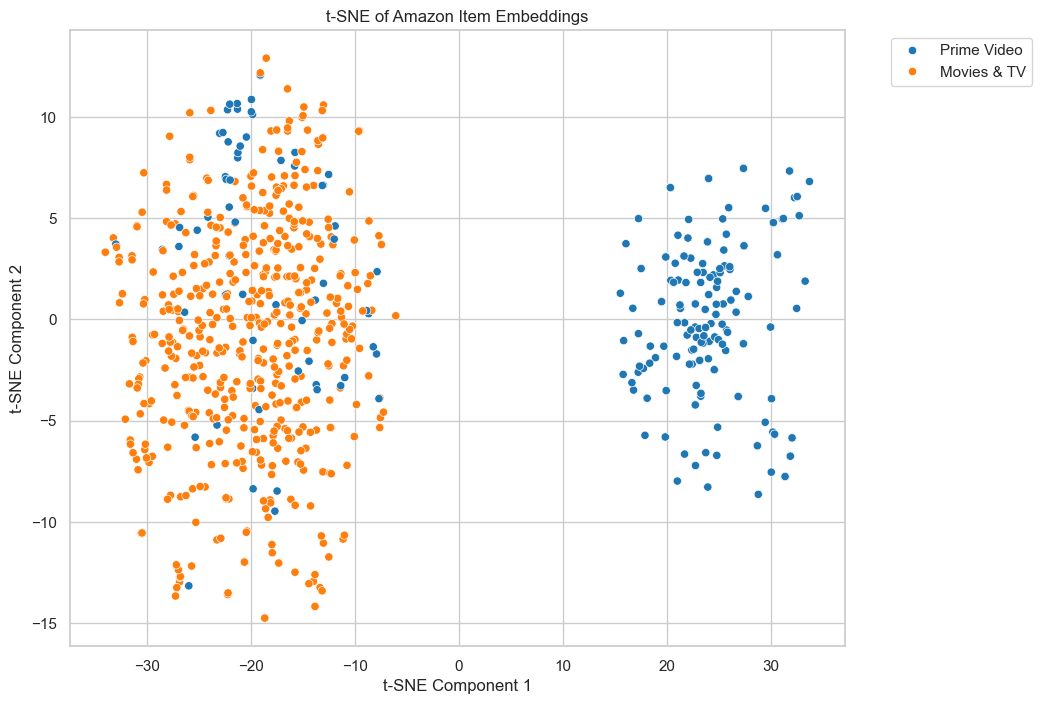

In [5]:
# Visualize Embeddings with t-SNE

# Plot the t-SNE-reduced embeddings
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tsne_x', y='tsne_y', hue='main_category', data=data, palette='tab10', legend='full')
plt.title('t-SNE of Amazon Item Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Cluster Analysis with K-Means
Apply K-Means clustering to the embeddings and visualize the resulting clusters.

In [ ]:
# Cluster Analysis with K-Means

# Apply K-Means clustering to the embeddings
kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(embeddings)

# Visualize the resulting clusters using PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca_x', y='pca_y', hue='cluster', data=data, palette='tab10', legend='full')
plt.title('K-Means Clustering of Amazon Item Embeddings (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Visualize the resulting clusters using t-SNE
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tsne_x', y='tsne_y', hue='cluster', data=data, palette='tab10', legend='full')
plt.title('K-Means Clustering of Amazon Item Embeddings (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Evaluate Clusters
Evaluate the quality of the clusters using metrics such as silhouette score and visualize the cluster centers.

In [ ]:
from sklearn.metrics import silhouette_score

# Evaluate Clusters

# Calculate the silhouette score to evaluate the quality of the clusters
silhouette_avg = silhouette_score(embeddings, data['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# Visualize the cluster centers
cluster_centers = kmeans.cluster_centers_

# Reduce dimensionality of cluster centers using PCA
pca_cluster_centers = pca_2d.transform(cluster_centers)

# Plot the cluster centers on the PCA-reduced embeddings
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca_x', y='pca_y', hue='cluster', data=data, palette='tab10', legend='full')
plt.scatter(pca_cluster_centers[:, 0], pca_cluster_centers[:, 1], s=300, c='red', label='Cluster Centers', marker='X')
plt.title('Cluster Centers on PCA-Reduced Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Reduce dimensionality of cluster centers using t-SNE
tsne_cluster_centers = tsne.fit_transform(cluster_centers)

# Plot the cluster centers on the t-SNE-reduced embeddings
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tsne_x', y='tsne_y', hue='cluster', data=data, palette='tab10', legend='full')
plt.scatter(tsne_cluster_centers[:, 0], tsne_cluster_centers[:, 1], s=300, c='red', label='Cluster Centers', marker='X')
plt.title('Cluster Centers on t-SNE-Reduced Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load Data
books = pd.read_csv('sampled_books_embeddings.csv')
movies = pd.read_csv('sampled_Movies_and_TV_embeddings.csv')
health_and_household = pd.read_csv('sampled_Health_and_Household_embeddings.csv')
electronics = pd.read_csv('sampled_Electronics_embeddings.csv')

In [2]:
# Preprocess Data
def preprocess_embeddings(data):
    embeddings = np.array(data['embeddings'].apply(lambda x: np.fromstring(x.strip('[]'), sep=' ')).tolist())
    embeddings = (embeddings - embeddings.mean(axis=0)) / embeddings.std(axis=0)
    return embeddings

embeddings_books = preprocess_embeddings(books)
embeddings_movies = preprocess_embeddings(movies)
embeddings_health_and_household = preprocess_embeddings(health_and_household)
embeddings_electronics = preprocess_embeddings(electronics)

# Combine Embeddings
combined_embeddings = np.vstack((embeddings_books, embeddings_movies, embeddings_health_and_household, embeddings_electronics))

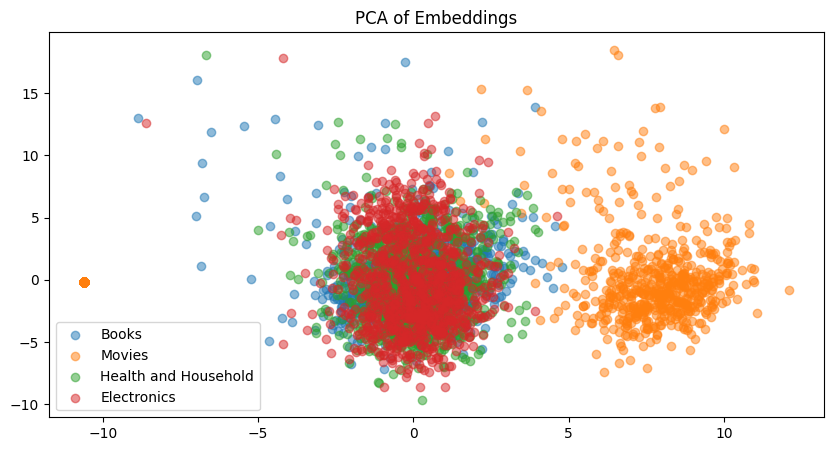

In [8]:
# Visualize Embeddings with PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(combined_embeddings)

plt.figure(figsize=(10, 5))
plt.scatter(pca_result[:len(embeddings_books), 0], pca_result[:len(embeddings_books), 1], label='Books', alpha=0.5)
plt.scatter(pca_result[len(embeddings_books):len(embeddings_books) + len(embeddings_movies), 0], pca_result[len(embeddings_books):len(embeddings_books) + len(embeddings_movies), 1], label='Movies', alpha=0.5)
plt.scatter(pca_result[len(embeddings_books) + len(embeddings_movies):len(embeddings_books) + len(embeddings_movies) + len(embeddings_health_and_household), 0], pca_result[len(embeddings_books) + len(embeddings_movies):len(embeddings_books) + len(embeddings_movies) + len(embeddings_health_and_household), 1], label='Health and Household', alpha=0.5)
plt.scatter(pca_result[len(embeddings_books) + len(embeddings_movies) + len(embeddings_health_and_household):, 0], pca_result[len(embeddings_books) + len(embeddings_movies) + len(embeddings_health_and_household):, 1], label='Electronics', alpha=0.5)
plt.legend()
plt.title('PCA of Embeddings')
plt.show()

/Users/niclasclassen/Code/Master/3-Semester/research-project/.venv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


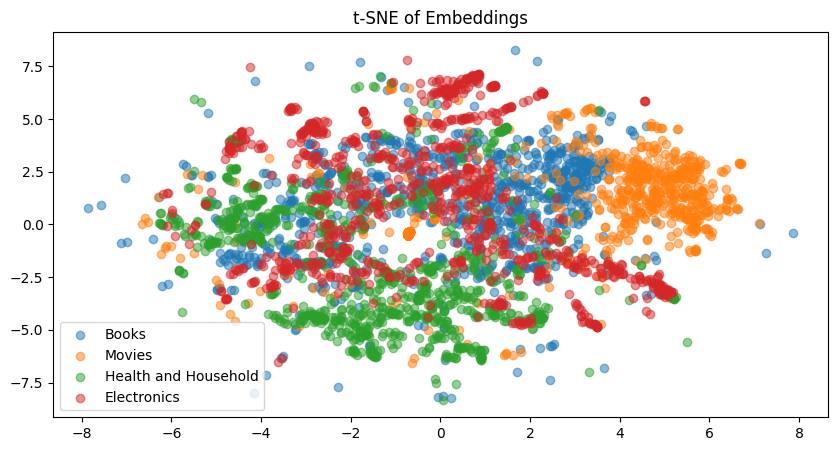

In [4]:
# Visualize Embeddings with t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(combined_embeddings)

plt.figure(figsize=(10, 5))
plt.scatter(tsne_result[:len(embeddings_books), 0], tsne_result[:len(embeddings_books), 1], label='Books', alpha=0.5)
plt.scatter(tsne_result[len(embeddings_books):len(embeddings_books) + len(embeddings_movies), 0], tsne_result[len(embeddings_books):len(embeddings_books) + len(embeddings_movies), 1], label='Movies', alpha=0.5)
plt.scatter(tsne_result[len(embeddings_books) + len(embeddings_movies):len(embeddings_books) + len(embeddings_movies) + len(embeddings_health_and_household), 0], tsne_result[len(embeddings_books) + len(embeddings_movies):len(embeddings_books) + len(embeddings_movies) + len(embeddings_health_and_household), 1], label='Health and Household', alpha=0.5)
plt.scatter(tsne_result[len(embeddings_books) + len(embeddings_movies) + len(embeddings_health_and_household):, 0], tsne_result[len(embeddings_books) + len(embeddings_movies) + len(embeddings_health_and_household):, 1], label='Electronics', alpha=0.5)
plt.legend()
plt.title('t-SNE of Embeddings')
plt.show()